In [125]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import csv, sqlite3

### ETL Step1: Load Data 

In [126]:
input_file_name = input("Please input file name：ECQ_D.csv: ")  ## Enter key to confirm input

Please input file name：ECQ_D.csv: ECQ_D.csv


In [127]:
os.chdir(r"C:\\Users\laura\Desktop\dissertation\Python\AI_model\ECQ_10_years_PA7")# You may change the path accordingly
subset_varible=["SEQN","ECD010","ECQ020","ECQ060","ECD070A","MCQ080E","WHQ030E"]  # Filter specified variables

In [128]:
data=pd.read_csv(input_file_name)
data1 = data[subset_varible]

### ETL Step2: Transform

#### Data Cleanning 

In [129]:
data1 = data1.dropna(axis = 0, how ='any') #Remove empty data
data1 = data1[data1.ECD010 <= 60] ; data1 = data1[data1.ECQ060 <= 2]
data1 = data1[data1.ECD070A <= 20] ; data1 = data1[data1.WHQ030E <= 3]
data1 = data1[data1.MCQ080E <= 2] ; data1 = data1[data1.ECQ020 <= 2]#Remove abnormal data
print(data1.shape) #Check data dimensions
data1.MCQ080E[data1['MCQ080E'] == 2] = 0 #Change value 2 to 0 which means overweight
data1=data1[~data1['ECD010'].isin([999])] # Remove data contains 999 value
data1.head()

(3154, 7)


,SEQN,ECD010,ECQ020,ECQ060,ECD070A,MCQ080E,WHQ030E
1,31128.0,33.0,1.0,1.0,4.0,0.0,2.0
2,31129.0,19.0,2.0,2.0,6.0,0.0,3.0
4,31137.0,17.0,2.0,2.0,7.0,0.0,1.0
5,31138.0,21.0,2.0,2.0,7.0,0.0,3.0
6,31140.0,31.0,2.0,2.0,10.0,0.0,3.0


In [130]:
# connect function opens a connection to the SQLite database file, 
conn = sqlite3.connect('database.db')
#Similarly we will make connection with other databases like Oracle, DB2 etc.
print(conn)

In [131]:
# Drop a table name Crypto if it exists already
try:
    conn.execute('DROP TABLE IF EXISTS `tan2345` ')
except Exception as e:
    raise(e)
finally:
    print('Table dropped')

Table dropped


In [132]:
# Judge whether the table in the sqlite database exists, if not exists, then create it.
def create_table():
    conn = sqlite3.connect("database.db")
    try:
        create_tb_cmd='''
       create table tan2345(SEQN integer ,ECD010 integer,ECQ020 integer,ECQ060 integer,WHQ030E integer,ECD070A integer,MCQ080E integer);
        '''
        conn.execute(create_tb_cmd)
    except:
        print("Create table failed")
        return False
    #conn.execute(insert_dt_cmd)
    conn.commit()
create_table()

### ETL Step3: Load data from the database

In [133]:
conn = sqlite3.connect("database.db")
cu=conn.cursor()
#Insert the newly fetched data into the database's table 
data1.to_sql('tan2345',conn, if_exists='append', index=False)  
conn.commit()

In [134]:
##Read the newest data from the database
conn = sqlite3.connect("database.db")
#print(conn)
sql="SELECT * from tan2345"
data2=pd.read_sql(sql,conn)
data2.head()

,SEQN,ECD010,ECQ020,ECQ060,WHQ030E,ECD070A,MCQ080E
0,31128,33,1,1,2,4,0
1,31129,19,2,2,3,6,0
2,31137,17,2,2,1,7,0
3,31138,21,2,2,3,7,0
4,31140,31,2,2,3,10,0


## Linear Regression 

In [135]:
import numpy as np
import pandas as pd
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [136]:
data2.describe()

,SEQN,ECD010,ECQ020,ECQ060,WHQ030E,ECD070A,MCQ080E
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,36287.156627,25.902980,1.863982,1.868738,2.632847,6.810399,0.097971
std,3011.740684,6.053266,0.342862,0.337740,0.728391,1.414507,0.297322
min,31128.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,33629.250000,21.000000,2.000000,2.000000,3.000000,6.000000,0.000000
50%,36299.500000,25.000000,2.000000,2.000000,3.000000,7.000000,0.000000
75%,38875.500000,30.000000,2.000000,2.000000,3.000000,8.000000,0.000000
max,41471.000000,44.000000,2.000000,2.000000,3.000000,13.000000,1.000000


In [163]:
l = data2.shape[0]
reg=linear_model.LinearRegression()
x_data=data2["ECD010"].values.reshape((1,-1))+np.random.randint(-500, 500, l) / 1000
y_data=data2["ECD070A"].values.reshape((1,-1))+np.random.randint(-500, 500, l) / 1000

In [149]:
#x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=123)

In [150]:
print(x_data)

[[33 19 17 ... 22 32 26]]


In [151]:
print(y_data)

[[4 6 7 ... 9 9 5]]


In [152]:
model = LinearRegression().fit(x_data, y_data)

In [153]:
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)

coefficient of determination: nan


D:\Attracta\Anaconda\Install\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [154]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [4. 6. 7. ... 9. 9. 5.]
slope: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [155]:
y_pred = model.predict(x_data)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[4. 6. 7. ... 9. 9. 5.]]


<AxesSubplot:>

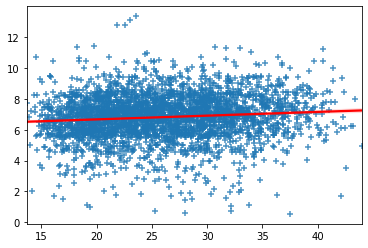

In [165]:
sns.regplot(x=x_data, y=y_data,data=data2, marker="+",line_kws={"color": "red"}) #spline curve 

In [158]:
sns.lmplot(x=x_data, y=x_data, data=data2,marker="+",ci=68, truncate=False)

TypeError: lmplot() got an unexpected keyword argument 'marker'

## Build Model

In [12]:
from sklearn.model_selection import train_test_split #Split training set and test set
from sklearn.linear_model import LogisticRegression #Logic Regression Model
from sklearn import svm
from sklearn.svm import SVC #SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest Model
from sklearn import metrics #ROC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
def ModelLogic(train_x : pd.DataFrame, train_y : pd.DataFrame): #LogicRegression
    x = train_x.values ; y = train_y.iloc[:, 0].values
    model = LogisticRegression() #Build LogicRegression Model y = 1 / (1 + exp ** (-x))
    model.fit(x, y) #Train Model
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_)
    return model
 
def ModelSVC(train_x : pd.DataFrame, train_y : pd.DataFrame): #SVC
    x = train_x.values ; y = train_y.iloc[:, 0].values
    model = SVC(C = 2, kernel = 'sigmoid', probability = True) #probability must be True
    model.fit(x, y)
    return model
 
def ModelForest(train_x : pd.DataFrame, train_y : pd.DataFrame): #RandomForest
    x = train_x.values ; y = train_y.iloc[:, 0].values
    model = RandomForestClassifier(max_depth = 6, n_estimators = 200, random_state = 5)
    model.fit(x, y)
    return model

In [14]:
def ModelTest(model, model_name, test_x, test_y, xlabel = 'x', ylabel = 'y'): #Define model checking function
    display = metrics.plot_roc_curve(model, test_x, test_y) #ROC
    plt.ylabel(ylabel) ; plt.xlabel(xlabel) #Set X and Y axis
    plt.title(model_name + ' ROC')
    plt.show()
    pred = list(model.predict(test_x)) #Predict test set data
    pd_rl = pd.DataFrame({'pred' : pred, 'true' : test_y.iloc[:, 0].values})
    print(pd.crosstab(pd_rl.true, pd_rl.pred)) #Confusion matrix
    try:
        TP = pd.crosstab(pd_rl.true, pd_rl.pred)[1][1] #True Positive example: the actual value is 1, the predicted value is also 1
    except:
        TP = 0
    try:
        FP = pd.crosstab(pd_rl.true, pd_rl.pred)[1][0] #False positive example: actual value is 0, predicted value is 1
    except:
        FP = 0
    try:
        TN = pd.crosstab(pd_rl.true, pd_rl.pred)[0][0] #True negative example: the actual value is 0, and the predicted value is also 0
    except:
        TN = 0
    try:
        FN = pd.crosstab(pd_rl.true, pd_rl.pred)[0][1] #False Negative example: the actual value is 1, the predicted value is 0
    except:
        FN = 0
    #Model Accuracy、Precision、Sensitivity、Recall/Specificity、F1 value、cohen's kappa
    test_dict = {}
    print('Accuracy:' + str(model.score(test_x, test_y))) ; test_dict.update({'Accuracy' : model.score(test_x, test_y)}) #Model evaluation, accuracy
    try:
        print('Precision:' + str(TP / (TP + FP))) ; test_dict.update({'Precision' : TP / (TP + FP)}) #Model evaluation, accuracy rate
    except:
        print('Precision:' + str(0)) ; test_dict.update({'Precision' : 0}) #Model evaluation, accuracy rate
    try:
    #Correctly judge the rate of patients;
        print('Sensitivity:' + str(TP / (TP + FN))) ; test_dict.update({'Sensitivity' : TP / (TP + FN)})
    except:
        print('Sensitivity:' + str(0)) ; test_dict.update({'Sensitivity' : 0}) #Model evaluation, recall/sensitivity
    #Correctly judge the rate of non-patients
    print('Specificity:' + str(TN / (TN + FP))) ; test_dict.update({'Specificity' : TN / (TN + FP)})
    print('F1：' + str(2 * TP / (2 * TP + FN + FP))) ; test_dict.update({'F1' : TN / 2 * TP / (2 * TP + FN + FP)}) #Model evaluation, F1 value
    p0 = (TP + TN) / (TP + FP + TN + FN)
    pe = ((TP  + FN) * (TP + FP) + (TN + FP) * (TN + FN)) / (TP + FP + TN + FN) ** 2
    print("cohen's kappa:" + str((p0 - pe) / (1 - pe))) ; test_dict.update({"cohen's kappa" : (p0 - pe) / (1 - pe)})  #Model evaluation, cohen's kappa coefficient value
    return test_dict

#Specificity = number of true negatives TN/(number of true negatives TN + number of false positives FP))*100%. 
    #print('Accuracy:'+ accuracy_score(pd_rl.true, pd_rl.pred))
        #print('Confusion Matrix'+ confusion_matrix(pd.true, pd.pred))
        #Model evaluation, sensitivity = number of true positives TP/(number of true positives TP + number of false negatives FN) * 100%.

In [15]:
#No risk factor:ECQ020
data1_x = data2[['ECD010', 'ECQ060', 'ECD070A','WHQ030E']] #Choose X variable
data1_y = data2[['MCQ080E']] #Choose Y variable
train1_x, test1_x, train1_y, test1_y = train_test_split(data1_x, data1_y, train_size = 0.8, random_state = 123) #20% Test; 80% Train Set
 
#With Risk Factor: ECQ020
data2_x = data2[['ECD010', 'ECQ060', 'ECD070A','WHQ030E', 'ECQ020']] #Choose X variable
data2_y = data2[['MCQ080E']] #Choose Y variable
train2_x, test2_x, train2_y, test2_y = train_test_split(data2_x, data2_y, train_size = 0.8, random_state = 123) #20% Test; 80% Train Set

Model slope:     [-0.02298014 -0.43034555  0.09436582 -1.50808294]
Model intercept: [1.86847385]


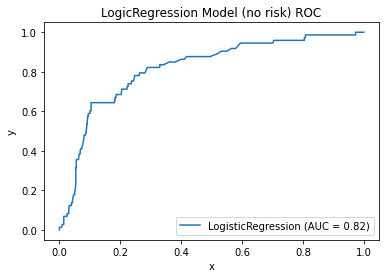

pred    0  1
true        
0     552  6
1      71  2
Accuracy:0.8779714738510301
Precision:0.25
Sensitivity:0.0273972602739726
Specificity:0.989247311827957
F1：0.04938271604938271
cohen's kappa:0.02715095208537758


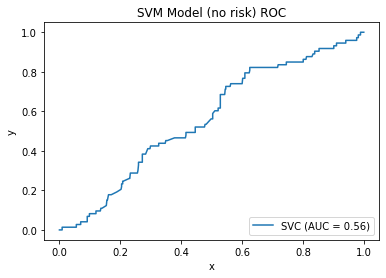

pred    0   1
true         
0     506  52
1      68   5
Accuracy:0.8098256735340729
Precision:0.08771929824561403
Sensitivity:0.0684931506849315
Specificity:0.9068100358422939
F1：0.07692307692307693
cohen's kappa:-0.027296901286156396


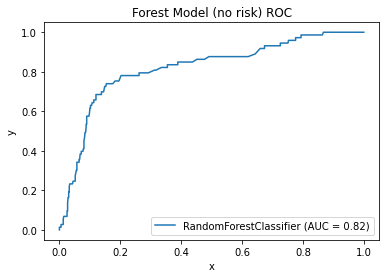

pred    0   1
true         
0     542  16
1      61  12
Accuracy:0.8779714738510301
Precision:0.42857142857142855
Sensitivity:0.1643835616438356
Specificity:0.9713261648745519
F1：0.2376237623762376
cohen's kappa:0.18536961588115985


In [16]:
modellog1 = ModelLogic(train1_x, train1_y) #Build a logistic regression model
modelsvc1 = ModelSVC(train1_x, train1_y) #Build SVC Model1
modelforest1 = ModelForest(train1_x, train1_y) #Build a random forest model1

log1=ModelTest(modellog1, "LogicRegression Model (no risk)", test1_x, test1_y)
svc1 = ModelTest(modelsvc1, "SVM Model (no risk)", test1_x, test1_y)
forest1 = ModelTest(modelforest1, "Forest Model (no risk)", test1_x, test1_y)

Model slope:     [-0.02292426 -0.42982413  0.09489401 -1.50799388 -0.03519794]
Model intercept: [1.92769822]


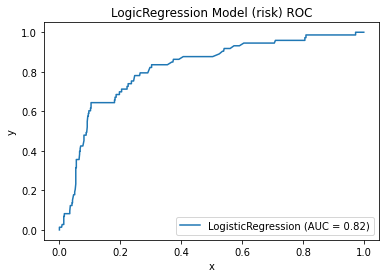

pred    0  1
true        
0     552  6
1      71  2
Accuracy:0.8779714738510301
Precision:0.25
Sensitivity:0.0273972602739726
Specificity:0.989247311827957
F1：0.04938271604938271
cohen's kappa:0.02715095208537758


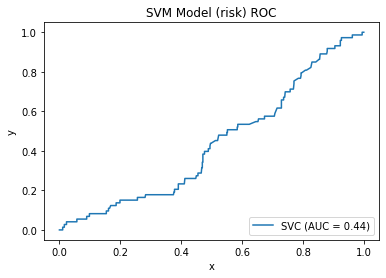

pred    0   1
true         
0     511  47
1      68   5
Accuracy:0.8177496038034865
Precision:0.09615384615384616
Sensitivity:0.0684931506849315
Specificity:0.9157706093189965
F1：0.08
cohen's kappa:-0.017984652722248043


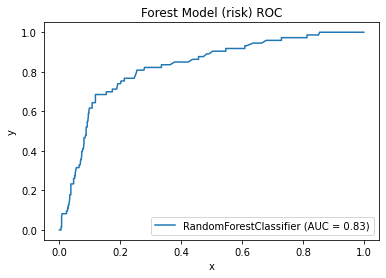

pred    0   1
true         
0     542  16
1      65   8
Accuracy:0.8716323296354992
Precision:0.3333333333333333
Sensitivity:0.1095890410958904
Specificity:0.9713261648745519
F1：0.16494845360824742
cohen's kappa:0.11424016082352752


In [17]:
modellog2 = ModelLogic(train2_x, train2_y) #Build a logistic regression model
modelsvc2 = ModelSVC(train2_x, train2_y) #Build SVC Model1
modelforest2 = ModelForest(train2_x, train2_y) #Build a random forest model1

log2=ModelTest(modellog2, 'LogicRegression Model (risk)', test2_x, test2_y)
svc2 = ModelTest(modelsvc2, 'SVM Model (risk)', test2_x, test2_y)
forest2 = ModelTest(modelforest2, 'Forest Model (risk)', test2_x, test2_y)

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
pred_prob1 = modellog1.predict_proba(test1_x)
pred_prob2 = modelsvc1.predict_proba(test1_x)
pred_prob3 = modelforest1.predict_proba(test1_x)

pred_prob4 = modellog2.predict_proba(test2_x)
pred_prob5 = modelsvc2.predict_proba(test2_x)
pred_prob6 = modelforest2.predict_proba(test2_x)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test1_y, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test1_y, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(test1_y, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(test2_y, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(test2_y, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(test2_y, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score1 = roc_auc_score(test1_y, pred_prob1[:,1])
auc_score2 = roc_auc_score(test1_y, pred_prob2[:,1])
auc_score3 = roc_auc_score(test1_y, pred_prob3[:,1])
auc_score4 = roc_auc_score(test2_y, pred_prob4[:,1])
auc_score5 = roc_auc_score(test2_y, pred_prob5[:,1])
auc_score6 = roc_auc_score(test2_y, pred_prob6[:,1])

print(auc_score1, auc_score2,auc_score3)
print(auc_score4, auc_score5,auc_score6)

0.8174129719644524 0.5628344871606029 0.8179530613246919
0.8178303137428193 0.4357907399224235 0.8263735454411548


In [19]:
Variance1 = np.var(pred_prob1)
Variance2 = np.var(pred_prob2)
Variance3 = np.var(pred_prob3)
Variance4 = np.var(pred_prob4)
Variance5 = np.var(pred_prob5)
Variance6 = np.var(pred_prob6)
Variance1,Variance2,Variance3,Variance4,Variance5,Variance6

(0.17831723717479647,
 0.16699732810855256,
 0.1824107865593302,
 0.17833006487948536,
 0.16724011726263416,
 0.1805858136788988)

In [21]:
# print('Confusion Matrix'+ confusion_matrix(pd_rl.true, pd_rl.pred))
# print('Coefficients: ', model.coef_)
#print('Accuracy:'+ accuracy_score(pd_rl.true, pd_rl.pred))

In [22]:
#SSE is sum of squared errors
SSE1=np.mean((np.mean(pred_prob1)-data1_y)**2)
SSE2=np.mean((np.mean(pred_prob4)-data2_y)**2)
Bias1 =SSE1-Variance1
Bias2 =SSE2-Variance2
Bias1, Bias2

(MCQ080E    0.071683
 dtype: float64,
 MCQ080E    0.083003
 dtype: float64)

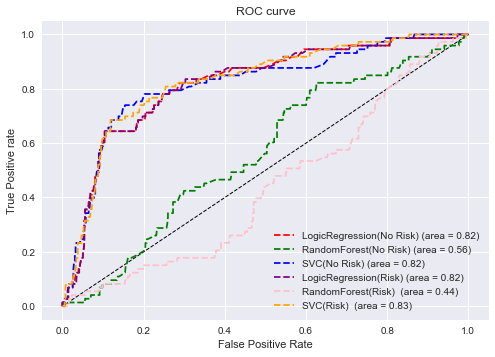

In [23]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot([0, 1], [0, 1], color = 'black', lw = 1, linestyle = '--')
plt.plot(fpr1, tpr1, linestyle='--',color='red', label = 'LogicRegression(No Risk) (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label = 'RandomForest(No Risk) (area = %0.2f)' % auc_score2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label = 'SVC(No Risk) (area = %0.2f)' % auc_score3)
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label = 'LogicRegression(Risk) (area = %0.2f)' % auc_score4)
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label = 'RandomForest(Risk)  (area = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label = 'SVC(Risk)  (area = %0.2f)' % auc_score6)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [26]:
list = [auc_score1, auc_score2, auc_score3, auc_score4, auc_score5]
print(max(list))

0.8179530613246919


In [24]:
test_dict = {i:[log1[i], log2[i], svc1[i], svc2[i], forest1[i], forest2[i]] for i in log1.keys()}
test_df = pd.DataFrame.from_dict(test_dict, orient = 'index')
test_df.columns = ['LogicRisk', ' LogicNoRisk', ' SVCRisk', ' SVCNoRisk', ' ForestRisk', ' ForestNoRisk']
test_df

,LogicRisk,LogicNoRisk,SVCRisk,SVCNoRisk,ForestRisk,ForestNoRisk
Accuracy,0.877971,0.877971,0.809826,0.817750,0.877971,0.871632
Precision,0.250000,0.250000,0.087719,0.096154,0.428571,0.333333
Sensitivity,0.027397,0.027397,0.068493,0.068493,0.164384,0.109589
Specificity,0.989247,0.989247,0.906810,0.915771,0.971326,0.971326
F1,6.814815,6.814815,9.730769,10.220000,32.198020,22.350515
cohen's kappa,0.027151,0.027151,-0.027297,-0.017985,0.185370,0.114240


<AxesSubplot:>

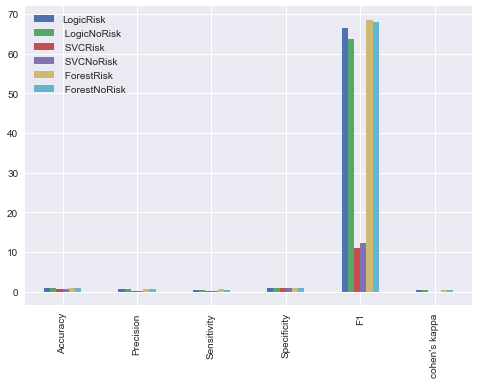

In [32]:
test_df.plot(kind='bar', stacked=False)

# Association

In [15]:
data2.columns = ["ID","Mother's age when born","Mother smoked when pregnant",
                   "Receive newborn care at health facility","How do you consider weight",
                   "Weight at birth, pounds","Doctor confirmed overweight"]
data2.head()

,ID,Mother's age when born,Mother smoked when pregnant,Receive newborn care at health facility,How do you consider weight,"Weight at birth, pounds",Doctor confirmed overweight
0,31128,33,1,1,2,4,0
1,31129,19,2,2,3,6,0
2,31137,17,2,2,1,7,0
3,31138,21,2,2,3,7,0
4,31140,31,2,2,3,10,0


<AxesSubplot:xlabel='Mother smoked when pregnant', ylabel='Weight at birth, pounds'>

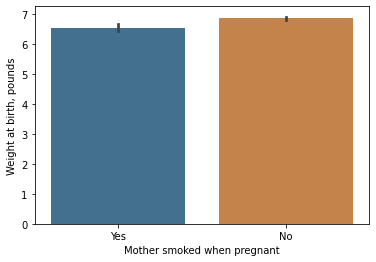

In [18]:
data2["Mother smoked when pregnant"] = data2["Mother smoked when pregnant"].map({1:'Yes', 2:'No',3:'Unclear'}) 
sns.barplot(x="Mother smoked when pregnant",y="Weight at birth, pounds",data=data2,saturation=.5)

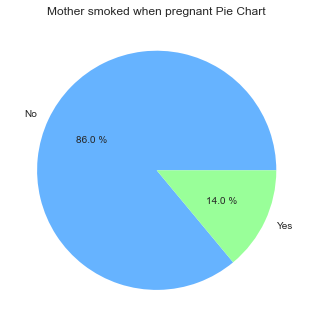

In [59]:
num_list = list(data2['Mother smoked when pregnant'].value_counts()) #获取列ECQ020数据
name_list = list(data2['Mother smoked when pregnant'].value_counts().index) #获取列ECQ020有哪些值
plt.axes(aspect = 1) #饼图类型
colors = ['#66b3ff','#99ff99','#ffcc99']
plt.pie(x = num_list, labels = name_list,colors = colors, autopct = '%3.1f %%') #饼图
plt.title('Mother smoked when pregnant' + ' Pie Chart') #设置标题
plt.show()

<AxesSubplot:ylabel='Count'>

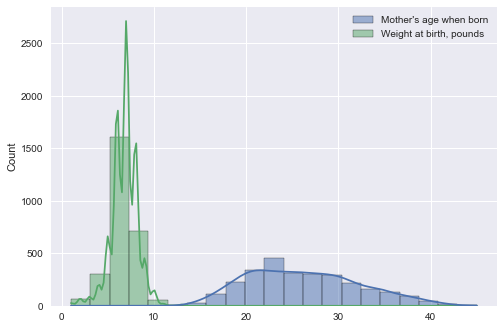

In [60]:
sns.histplot(data2[["Mother's age when born",'Weight at birth, pounds']], kde = True)

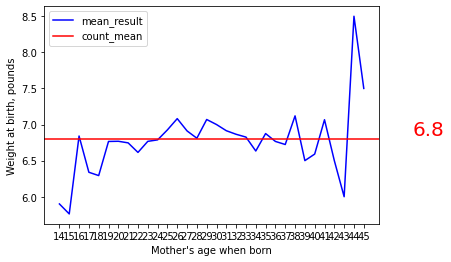

In [35]:
count_mean = data2.mean()['Weight at birth, pounds']  # Calculate the overall average value 
mean_result = data2.groupby("Mother's age when born").mean()['Weight at birth, pounds']  # Calculate the mean of different age groups
#mean_result = mean_result[mean_result.index <= 35]  # Filter out the age less than or equal to 35 years old
x_data = [str(int(i)) for i in mean_result.index]  
y_data = mean_result.values
#sns.lineplot(x_data,y_data, color = 'b', label = 'mean_result') #Line Chart
plt.plot(x_data,y_data, color = 'b', label = 'mean_result') #Line Chart
plt.axhline(y = count_mean, color = 'r', label = 'count_mean') #Add the average line
plt.text(36, 6.85, round(count_mean, 2), fontdict = {'size' : '20','color' : 'r'}) #Add Label
plt.legend() 
plt.ylabel('Weight at birth, pounds') ; plt.xlabel("Mother's age when born") #Add label for x, y axis
plt.show()

Text(0, 0.5, 'Weight at birth, pounds')

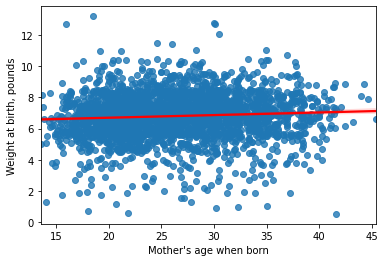

In [34]:
l = data2.shape[0] #Fetch the number of Rows
x = data2["Mother's age when born"].values + np.random.randint(-500, 500, l) / 1000
y = data2['Weight at birth, pounds'].values + np.random.randint(-500, 500, l) / 1000
sns.regplot(x=x, y=y,data=data2, line_kws={"color": "red"}) #spline curve 
# sns.regplot(x=x, y=y,data=newdata,scatter_kws={"color": "blue"}, line_kws={"color": "red"}) 
plt.xlabel("Mother's age when born")
plt.ylabel("Weight at birth, pounds")

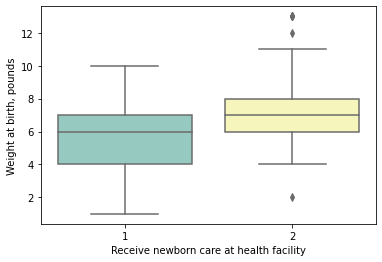

In [33]:
box_plot=sns.boxplot(x="Receive newborn care at health facility", y="Weight at birth, pounds", data=data2, palette="Set3")

In [17]:
del data2['ID']

<AxesSubplot:>

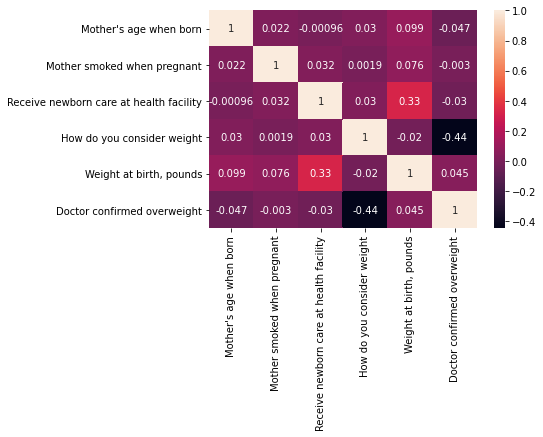

In [18]:
sns.heatmap(data2.corr(),annot = True)

In [38]:
#data2.corr();data2.cov()

In [27]:
#sns.pairplot(data2,kind='scatter')

In [28]:
#df = pd.DataFrame({'A':[1,2,3], 'B':[2,5,3], 'C':[5,2,1], 'D':['text',2,3] })
#calculate_pvalues(data2) 

In [45]:
import scipy.stats
result = scipy.stats.describe(data2, ddof=1, bias=False)
result

DescribeResult(nobs=2726, minmax=(array([41476,    14,     1,     1,     1,     1,     0], dtype=int64), array([51613,    45,     2,     2,     3,    13,     1], dtype=int64)), mean=array([4.66107557e+04, 2.62927366e+01, 1.86023478e+00, 1.88664710e+00,
       2.65113720e+00, 6.80080704e+00, 1.17021277e-01]), variance=array([8.58993845e+06, 3.65880353e+01, 1.20275027e-01, 1.00540901e-01,
       5.10543660e-01, 1.98122504e+00, 1.03365216e-01]), skewness=array([-0.03909908,  0.34323433, -2.07896246, -2.44057477, -1.70658065,
       -0.43315655,  2.38416432]), kurtosis=array([-1.2079902 , -0.55755836,  2.32378929,  3.95930952,  1.13529188,
        2.1485501 ,  3.68694397]))

In [ ]:
r = np.corrcoef(x, y)

In [49]:
from scipy.stats import ttest_ind
res = ttest_ind(data1, data2).pvalue
res

array([1., 1., 1., 1., 0., 0., 0.])

In [52]:
from scipy.stats import kstest
res = kstest(data2["Weight at birth, pounds"], 'norm')
res

KstestResult(statistic=0.9865444526653618, pvalue=0.0)

In [ ]:
#std deviation
s = np.sqrt((var_a + var_b)/2)
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)

In [ ]:
>>> from sklearn.datasets import fetch_20newsgroups_vectorized
>>> from sklearn.feature_selection import chi2
>>> data = fetch_20newsgroups_vectorized()
>>> X, y = data.data, data.target
>>> scores, pvalues = chi2(X, y)
>>> pvalues

In [ ]:
plt.hist(df['target'])

In [ ]:
data2.plot(x='ECQ060', y='ECD070A', style='o')
from sklearn.linear_model import LinearRegression
def ModelLinear(train_x : pd.DataFrame, train_y : pd.DataFrame):
    x = train_x.values ; y = train_y.iloc[:, 0].values
    model = LinearRegression()
    model.fit(x, y)
    return model 
    clf = LinearRegression()
    clf.fit(x,y)
    pred = clf.predict(x)
    ypred = clf.predict(y)
    print('AA'+ accuracy_score(y_true, y_pred, normalize=False))
    print(data2.shape())
    data0_x = data2[['ECD010']] #Choose X variable
data0_y = data2[['ECD070A']] #Choose Y variable
train0_x, test0_x, train0_y, test0_y = train_test_split(data0_x, data0_y, train_size = 0.8, random_state = 123) #20% Test; 80% Train Set
modellinear0 = ModelLinear(train0_x, train0_y)
linear0=ModelTest(modellinear0, "LinearRegression Model (no risk)", test0_x, test0_y)

In [27]:
# # predict probabilities
# pred_prob4 = modellog2.predict_proba(test2_x)
# pred_prob5 = modelsvc2.predict_proba(test2_x)
# pred_prob6 = modelforest2.predict_proba(test2_x)
# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr4, tpr4, thresh4 = roc_curve(test2_y, pred_prob4[:,1], pos_label=1)
# fpr5, tpr5, thresh5 = roc_curve(test2_y, pred_prob5[:,1], pos_label=1)
# fpr6, tpr6, thresh6 = roc_curve(test2_y, pred_prob6[:,1], pos_label=1)
# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(test2_y))]
# p_fpr, p_tpr, _ = roc_curve(test2_y, random_probs, pos_label=1)
# # auc scores
# from sklearn.metrics import roc_auc_score
# auc_score4 = roc_auc_score(test2_y, pred_prob4[:,1])
# auc_score5 = roc_auc_score(test2_y, pred_prob5[:,1])
# auc_score6 = roc_auc_score(test2_y, pred_prob6[:,1])

# print(auc_score4, auc_score5,auc_score6)

In [143]:
# # matplotlib
# import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# # plot roc curves
# plt.plot([0, 1], [0, 1], color = 'black', lw = 1, linestyle = '--')
# plt.plot(fpr4, tpr4, linestyle='--',color='red', label = 'LogicRegression Model (area = %0.2f)' % auc_score4)
# plt.plot(fpr5, tpr5, linestyle='--',color='green', label = 'RandomForest Model (area = %0.2f)' % auc_score5)
# plt.plot(fpr6, tpr6, linestyle='--',color='blue', label = 'SVC Model (area = %0.2f)' % auc_score6)
# plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show();

# roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(test1_y))]
# p_fpr, p_tpr, _ = roc_curve(test1_y, random_probs, pos_label=1)
# random_probs = [0 for i in range(len(test2_y))]
# p_fpr, p_tpr, _ = roc_curve(test2_y, random_probs, pos_label=1)
# plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

In [ ]:
###Heat Map
#plt.figure(figsize=(9,9))  
# new_varible=["Mother's age when born","Weight at birth, pounds"] 
# sns.heatmap(data2[new_varible[0:]].corr(),annot=True)#Remove first column of newdata
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')

In [ ]:
#print(data2.ECQ020.unique())

In [ ]:
#pred_prob0 = modellinear1.predict_proba(test1_x)
#pred_prob7 = modellinear2.predict_proba(test2_x)
#fpr0, tpr0, thresh0 = roc_curve(test1_y, pred_prob1[:,1], pos_label=1)
#fpr7, tpr7, thresh7 = roc_curve(test2_y, pred_prob7[:,1], pos_label=1)
#auc_score0 = roc_auc_score(test0_y, pred_prob0[:,1])
#auc_score7 = roc_auc_score(test2_y, pred_prob7[:,1])